# ADTA 5560: Recurrent Neural Networks for Sequence Data
## Part IV: Simple RNN with Sine Wave Data Implementation

### Neural Network Architecture and Design

In [46]:
#import libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
#hide warnings
import warnings
warnings.filterwarnings('ignore')

In [47]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
def generate_sine_data(num_points=768):
    """Generate sine wave data points between 0 and 50."""
    x = np.linspace(0, 50, num_points)
    y = np.sin(x)
    return x, y

def prepare_sequences(data, seq_length=10):
    """Prepare input sequences and target values for the RNN."""
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [49]:
# Generate data
print("Generating and preprocessing data...")
x_values, y_values = generate_sine_data()

# Prepare sequences
seq_length = 10
X, y = prepare_sequences(y_values, seq_length)


Generating and preprocessing data...


In [50]:

# Split data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input data for RNN [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:

# Create 64-unit model
model_64 = Sequential([
    SimpleRNN(64, input_shape=(seq_length, 1)),
    Dense(1)
])
model_64.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [52]:

# Train model
print("\nTraining 64-unit model...")
history_64 = model_64.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)



Training 64-unit model...
Epoch 1/50
16/16 [==============================] - 1s 21ms/step - loss: 0.1518 - mae: 0.3133 - val_loss: 0.0610 - val_mae: 0.2188
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0214 - mae: 0.1149 - val_loss: 0.0095 - val_mae: 0.0876
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0064 - mae: 0.0677 - val_loss: 0.0041 - val_mae: 0.0537
Epoch 4/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0466 - val_loss: 0.0028 - val_mae: 0.0431
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0380 - val_loss: 0.0020 - val_mae: 0.0374
Epoch 6/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0015 - mae: 0.0334 - val_loss: 0.0014 - val_mae: 0.0318
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0012 - mae: 0.0300 - val_loss: 0.0011 - val_mae: 0.0283
Epoch 8/50
16/16 [==============================] - 0s 6ms/ste

In [53]:

# Evaluate model
test_loss_64, test_mae_64 = model_64.evaluate(X_test, y_test, verbose=0)
y_pred_64 = model_64.predict(X_test)


5/5 [==============================] - 0s 3ms/step


In [54]:

# Print results
print("\n64-Unit Model Performance:")
print("=" * 50)
print(f"Test Loss (MSE): {test_loss_64:.6f}")
print(f"Test MAE: {test_mae_64:.6f}")



64-Unit Model Performance:
Test Loss (MSE): 0.000031
Test MAE: 0.004658


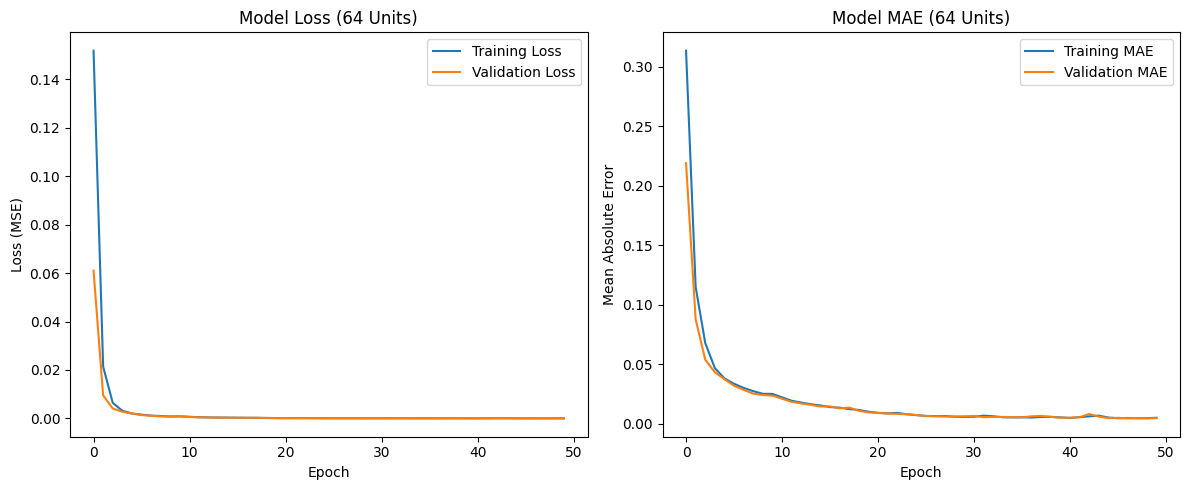

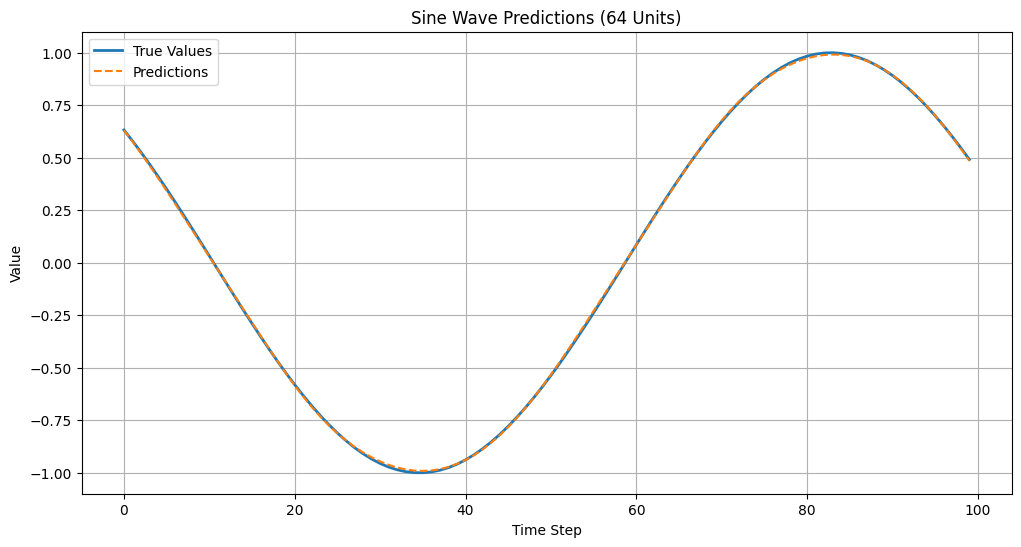

In [55]:

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_64.history['loss'], label='Training Loss')
plt.plot(history_64.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (64 Units)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_64.history['mae'], label='Training MAE')
plt.plot(history_64.history['val_mae'], label='Validation MAE')
plt.title('Model MAE (64 Units)')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test[:100], label='True Values', linewidth=2)
plt.plot(y_pred_64[:100], label='Predictions', linestyle='--')
plt.title('Sine Wave Predictions (64 Units)')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

#### Part 5: Simple RNN with 128 Units

In [56]:
# Create 128-unit model
model_128 = Sequential([
    SimpleRNN(128, input_shape=(seq_length, 1)),
    Dense(1)
])
model_128.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [57]:

# Train model
print("\nTraining 128-unit model...")
history_128 = model_128.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)



Training 128-unit model...
Epoch 1/50
16/16 [==============================] - 1s 21ms/step - loss: 0.0579 - mae: 0.1890 - val_loss: 0.0017 - val_mae: 0.0361
Epoch 2/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0053 - mae: 0.0608 - val_loss: 0.0067 - val_mae: 0.0702
Epoch 3/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0029 - mae: 0.0426 - val_loss: 0.0011 - val_mae: 0.0285
Epoch 4/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0012 - mae: 0.0293 - val_loss: 8.4153e-04 - val_mae: 0.0242
Epoch 5/50
16/16 [==============================] - 0s 7ms/step - loss: 7.7680e-04 - mae: 0.0239 - val_loss: 5.7333e-04 - val_mae: 0.0211
Epoch 6/50
16/16 [==============================] - 0s 6ms/step - loss: 5.9253e-04 - mae: 0.0211 - val_loss: 4.3933e-04 - val_mae: 0.0187
Epoch 7/50
16/16 [==============================] - 0s 7ms/step - loss: 4.7942e-04 - mae: 0.0191 - val_loss: 5.4647e-04 - val_mae: 0.0196
Epoch 8/50
16/16 [===============

In [58]:

# Evaluate model
test_loss_128, test_mae_128 = model_128.evaluate(X_test, y_test, verbose=0)
y_pred_128 = model_128.predict(X_test)


5/5 [==============================] - 0s 3ms/step



128-Unit Model Performance:
Test Loss (MSE): 0.000018
Test MAE: 0.003581


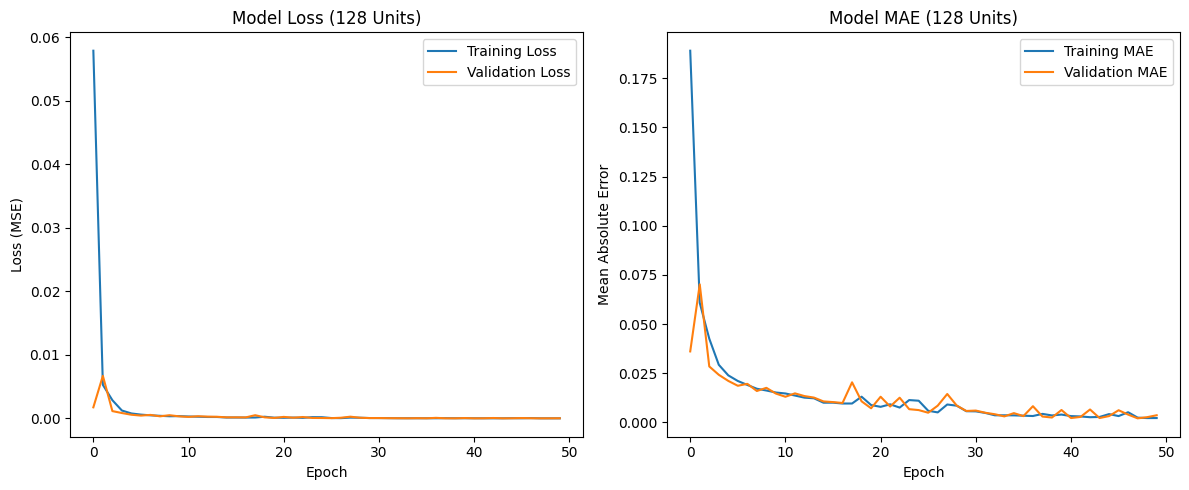

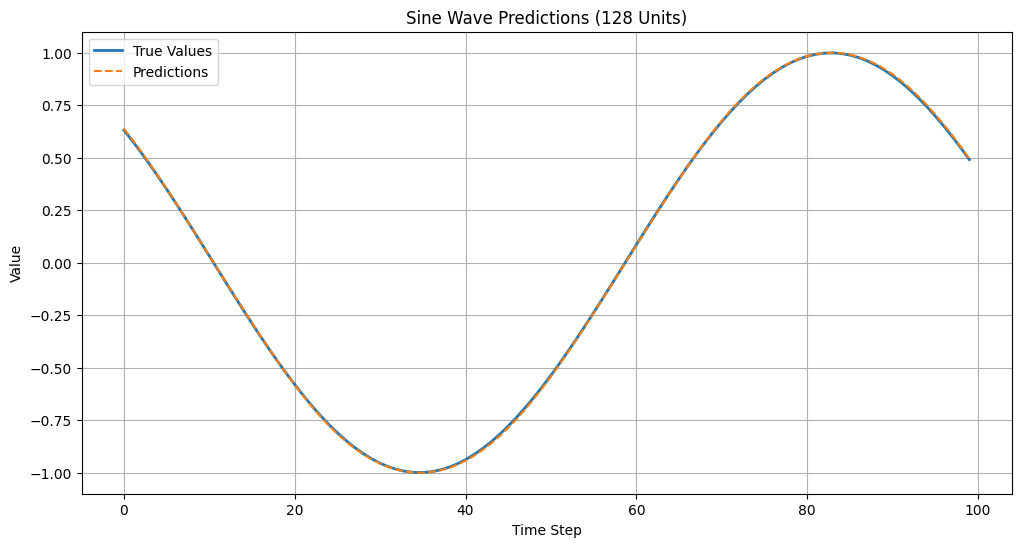

In [59]:

# Print results
print("\n128-Unit Model Performance:")
print("=" * 50)
print(f"Test Loss (MSE): {test_loss_128:.6f}")
print(f"Test MAE: {test_mae_128:.6f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_128.history['loss'], label='Training Loss')
plt.plot(history_128.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (128 Units)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_128.history['mae'], label='Training MAE')
plt.plot(history_128.history['val_mae'], label='Validation MAE')
plt.title('Model MAE (128 Units)')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test[:100], label='True Values', linewidth=2)
plt.plot(y_pred_128[:100], label='Predictions', linestyle='--')
plt.title('Sine Wave Predictions (128 Units)')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

#### Model Comparison Analysis

In [65]:
def plot_comparison(y_test, y_pred_64, y_pred_128):
    """Plot comparison of both models' predictions."""
    plt.figure(figsize=(15, 10))
    
    # Performance comparison plot
    plt.subplot(2, 1, 1)
    plt.plot(y_test[:100], label='True Values', linewidth=2)
    plt.plot(y_pred_64[:100], label='64-Unit RNN', linestyle='--')
    plt.plot(y_pred_128[:100], label='128-Unit RNN', linestyle=':')
    plt.title('Model Predictions Comparison')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    

    error_64 = np.abs(y_test[:100] - y_pred_64[:100])
    error_128 = np.abs(y_test[:100] - y_pred_128[:100])

    # Print statistical comparison
    print("\nModel Performance Comparison:")
    print("=" * 50)
    print("64-Unit Model:")
    print(f"Mean Absolute Error: {np.mean(error_64):.6f}")
    print(f"Standard Deviation of Error: {np.std(error_64):.6f}")
    print("\n128-Unit Model:")
    print(f"Mean Absolute Error: {np.mean(error_128):.6f}")
    print(f"Standard Deviation of Error: {np.std(error_128):.6f}")
    print("\nImprovement Metrics:")
    print(f"MAE Improvement: {((np.mean(error_64) - np.mean(error_128))/np.mean(error_64))*100:.2f}%")
    print(f"Error Stability Improvement: {((np.std(error_64) - np.std(error_128))/np.std(error_64))*100:.2f}%")

# Note: This code should be run after both models have been trained
# and their predictions (y_pred_64, y_pred_128) are available


Model Performance Comparison:
64-Unit Model:
Mean Absolute Error: 0.803255
Standard Deviation of Error: 0.580921

128-Unit Model:
Mean Absolute Error: 0.806446
Standard Deviation of Error: 0.583205

Improvement Metrics:
MAE Improvement: -0.40%
Error Stability Improvement: -0.39%


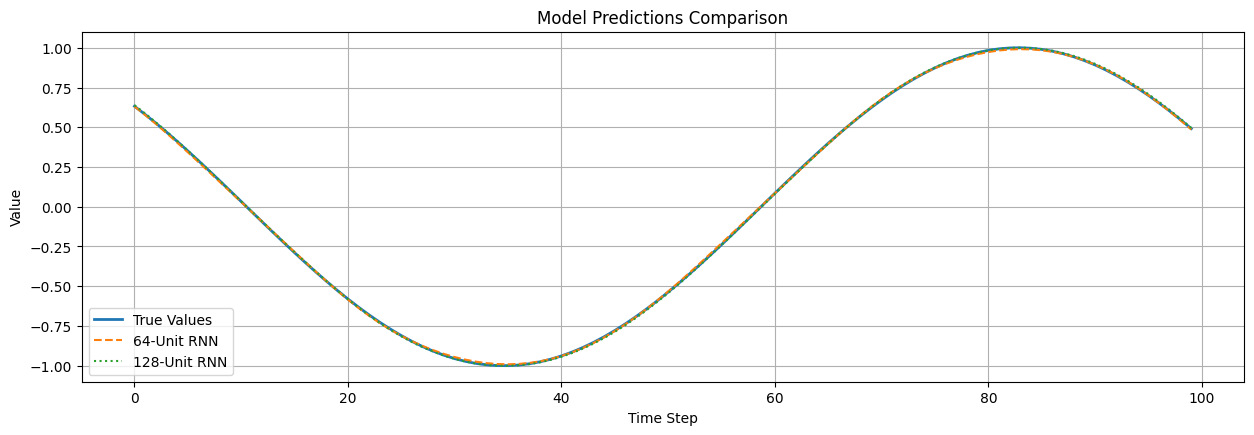

In [66]:
# run plot_comparison function
plot_comparison(y_test, y_pred_64, y_pred_128)